#Setup

In [66]:
from settings import ALL_CLASSES
from sklearn.metrics import balanced_accuracy_score

UNKNOWN_CLASS = "unknown"
SILENT_CLASS = "silence"


In [67]:
ALL_CLASSES

['yes',
 'no',
 'up',
 'down',
 'left',
 'right',
 'on',
 'off',
 'stop',
 'go',
 'silence',
 'unknown']

In [65]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.9 MB/s eta 0:00:00


In [3]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.8/266.8 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.2 MB/s eta 0:00:00


In [4]:
import wandb

In [5]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [68]:
!python download_data.py speech-waveform

wandb: Currently logged in as: spinach375 (dl-mini). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /content/wandb/run-20240505_093951-o5wx31m9
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run rogue-fighter-305
wandb: ⭐️ View project at https://wandb.ai/dl-mini/DL_PROJECT_RNN
wandb: 🚀 View run at https://wandb.ai/dl-mini/DL_PROJECT_RNN/runs/o5wx31m9
wandb: Downloading large artifact speech-waveform:latest, 3887.64MB. 3 files... 
wandb:   3 of 3 files downloaded.  
Done. 0:0:31.9
Downloaded files are in: /content/artifacts/speech-waveform:v0
wandb:                                                                                
wandb: 🚀 View run rogue-fighter-305 at: https://wandb.ai/dl-mini/DL_PROJECT_RNN/runs/o5wx31m9
wandb: ⭐️ View project at: https://wandb.ai/dl-mini/DL_PROJECT_RNN
wandb: Synced 5 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: Find logs at: .

In [123]:
import numpy as np

def balanced_confusion_m(y_true, y_pred, title='Balanced Confusion Matrix'):
  cm = confusion_matrix(y_true, y_pred)

  # Normalize the confusion matrix by row (i.e by the number of samples
  # in each class)
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  # Create a heatmap of the confusion matrix
  plt.figure(figsize=(10, 10))
  sns.heatmap(cm_normalized, annot=True, fmt='.2f', xticklabels=ALL_CLASSES, yticklabels=ALL_CLASSES)

  # Add labels
  plt.title(title)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')

  # Show the plot
  plt.show()

In [122]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def simple_cm(y_true, y_pred, title="Confusion Matrix"):
  # Calculate confusion matrix
  cm = confusion_matrix(y_true, y_pred)

  # Plot confusion matrix
  plt.figure(figsize=(10, 7))
  sns.heatmap(cm, annot=True, fmt='d', xticklabels=ALL_CLASSES, yticklabels=ALL_CLASSES)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title(title)
  plt.show()

# Testing on small sample

In [6]:
import torch

In [7]:
import sys
import torch
from torch.utils.data import DataLoader
from transformers import AutoFeatureExtractor, ASTForAudioClassification
from settings import ALL_CLASSES

In [8]:
dataset, labels = torch.load("artifacts/speech-waveform:v0/train.pt")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [9]:
from torch.utils.data import TensorDataset, DataLoader
tensor_dataset = TensorDataset(dataset, labels)

# Generate a permutation of indices
indices = torch.randperm(len(dataset))

# Use the indices to shuffle the dataset and labels
dataset = dataset[indices]
labels = labels[indices]

In [10]:
from transformers import WhisperProcessor, WhisperForConditionalGeneration

In [11]:
processor = WhisperProcessor.from_pretrained("openai/whisper-tiny.en")
model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-medium.en").to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.41M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.83k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.95k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.06G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/1.95k [00:00<?, ?B/s]

In [28]:
input_features = processor(
    dataset.numpy()[0:250], sampling_rate=16000, return_tensors="pt"
).input_features.to(device)

In [32]:
input_features[219]

tensor([[ 0.4022,  0.4099,  0.5162,  ..., -1.3320, -1.3320, -1.3320],
        [ 0.4675,  0.3990,  0.5190,  ..., -1.3320, -1.3320, -1.3320],
        [ 0.4756,  0.2875,  0.3361,  ..., -1.3320, -1.3320, -1.3320],
        ...,
        [ 0.1816,  0.2295,  0.2300,  ..., -1.3320, -1.3320, -1.3320],
        [ 0.2498,  0.2456,  0.3460,  ..., -1.3320, -1.3320, -1.3320],
        [ 0.2732,  0.1965,  0.2316,  ..., -1.3320, -1.3320, -1.3320]],
       device='cuda:0')

In [13]:
predicted_ids = model.generate(input_features)

In [16]:
transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)
transcription

[' Bed.',
 ' left.',
 ' you',
 ' Yes.',
 ' OFF!',
 ' Dog.',
 ' on.',
 ' Five.',
 ' Bird.',
 ' Yes.',
 ' Yes.',
 ' Marvin.',
 ' On.',
 ' dog',
 ' Bye.',
 ' On.',
 ' three',
 ' Wow.',
 ' cat',
 ' 7',
 ' Go!',
 ' Sheila',
 ' Yes',
 ' Three',
 ' One',
 ' six',
 ' One.',
 ' Dog.',
 ' 3',
 ' No.',
 ' Off.',
 ' Five.',
 ' Wow.',
 ' Op.',
 ' Right.',
 ' Wow.',
 ' Zero.',
 ' Marvin',
 ' Thanks.',
 ' off.',
 ' One.',
 ' Cool.',
 ' Five',
 ' Hey.',
 ' you',
 ' seven',
 ' Zero.',
 ' Dog.',
 ' Bird.',
 ' house.',
 ' Yes.',
 ' Three.',
 ' Zero.',
 ' Dog.',
 ' Seven.',
 ' Up.',
 ' DOG',
 ' ON.',
 ' Tree.',
 ' Yes.',
 ' Down.',
 ' 4',
 ' Two.',
 ' Yes.',
 ' three',
 ' 6.',
 ' 4',
 ' Right.',
 ' 7',
 ' Up.',
 ' 5',
 ' Left',
 ' Dog.',
 ' 1.',
 ' five',
 ' Go.',
 ' Bell.',
 ' Happy.',
 ' Cat.',
 ' No.',
 ' Nine.',
 ' on.',
 ' Go.',
 ' Up.',
 ' 7',
 ' None.',
 ' six',
 ' Bed.',
 ' Bed.',
 ' 2',
 ' Bed.',
 ' Left.',
 ' left.',
 ' left',
 ' Dog.']

In [20]:
import string

normalized_transcript = [s.lower().strip().translate(str.maketrans('', '', string.punctuation)) for s in transcription]
print(normalized_transcript)
print(len(normalized_transcript))

['bed', 'left', 'you', 'yes', 'off', 'dog', 'on', 'five', 'bird', 'yes', 'yes', 'marvin', 'on', 'dog', 'bye', 'on', 'three', 'wow', 'cat', '7', 'go', 'sheila', 'yes', 'three', 'one', 'six', 'one', 'dog', '3', 'no', 'off', 'five', 'wow', 'op', 'right', 'wow', 'zero', 'marvin', 'thanks', 'off', 'one', 'cool', 'five', 'hey', 'you', 'seven', 'zero', 'dog', 'bird', 'house', 'yes', 'three', 'zero', 'dog', 'seven', 'up', 'dog', 'on', 'tree', 'yes', 'down', '4', 'two', 'yes', 'three', '6', '4', 'right', '7', 'up', '5', 'left', 'dog', '1', 'five', 'go', 'bell', 'happy', 'cat', 'no', 'nine', 'on', 'go', 'up', '7', 'none', 'six', 'bed', 'bed', '2', 'bed', 'left', 'left', 'left', 'dog']
95


In [18]:
ALL_CLASSES = ["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go", "silence", UNKNOWN_CLASS]


In [23]:
def get_indices_of_ten(tensor):
    # Compare each element in the tensor to 10
    comparison = tensor.eq(10)
    # Get the indices where the comparison is True
    indices = torch.nonzero(comparison)
    return indices

In [24]:
get_indices_of_ten(labels[0:250])

tensor([[219,   0],
        [235,   0],
        [248,   0]])

In [25]:
labels[219]

tensor([10])

In [ ]:
input_features

In [37]:
is_silent = []

# Check if each audio is silent
for audio_tensor in input_features:
    # If the absolute value of all the elements in the tensor are less than a small threshold, the audio is silent
    if torch.all(torch.abs(audio_tensor) < 1.1):
        is_silent.append(True)
    else:
        pass
        #is_silent.append(False)

print(is_silent)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


In [23]:
transcript_indices = [ALL_CLASSES.index(t) if t in ALL_CLASSES else ALL_CLASSES.index(UNKNOWN_CLASS) for t in normalized_transcript]

In [24]:
transcript_indices_v2 = [ALL_CLASSES.index(t) if t in ALL_CLASSES else ALL_CLASSES.index(UNKNOWN_CLASS) if t != '' else ALL_CLASSES.index(SILENT_CLASS) for t in normalized_transcript]

In [25]:
from sklearn.metrics import balanced_accuracy_score

true_labels = labels[1005:1100].flatten().numpy()

# Calculate balanced accuracy
accuracy = balanced_accuracy_score(true_labels, transcript_indices)

print(f"Balanced accuracy: {accuracy}")

Balanced accuracy: 0.8409090909090909


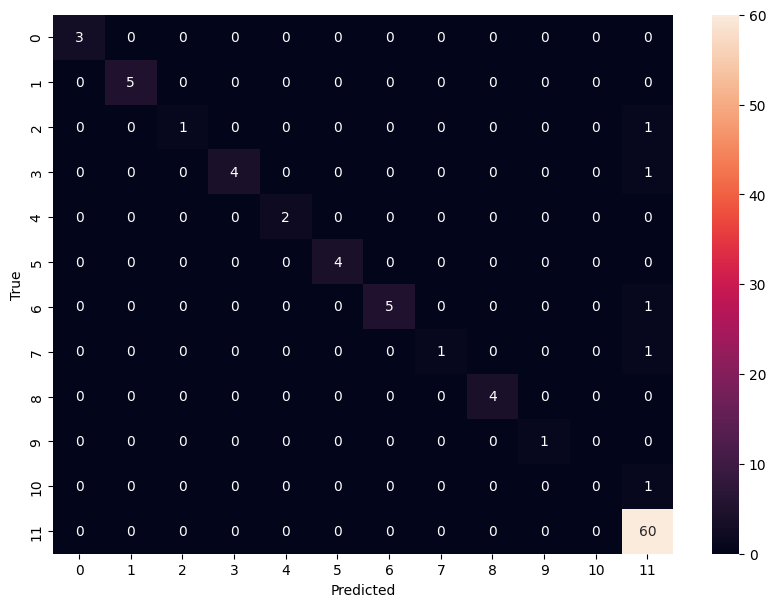

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Suppose `y_true` are the true labels and `y_pred` are the predicted labels
y_true = true_labels # replace with your true labels
y_pred = transcript_indices  # replace with your predicted labels

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Testing with transcribe method

In [6]:
!pip install git+https://github.com/openai/whisper.git

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-6t1_rlcr
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-6t1_rlcr
  Resolved https://github.com/openai/whisper.git to commit ba3f3cd54b0e5b8ce1ab3de13e32122d0d5f98ab
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-

In [7]:
!python download_data.py speech-raw

wandb: Currently logged in as: spinach375 (dl-mini). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /content/wandb/run-20240505_071335-p1q5d05k
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run forgotten-council-304
wandb: ⭐️ View project at https://wandb.ai/dl-mini/DL_PROJECT_RNN
wandb: 🚀 View run at https://wandb.ai/dl-mini/DL_PROJECT_RNN/runs/p1q5d05k
wandb: Downloading large artifact speech-raw:latest, 1916.24MB. 63687 files... 
wandb:   63687 of 63687 files downloaded.  
Done. 0:4:8.0
Downloaded files are in: /content/artifacts/speech-raw:v0
wandb:                                                                                
wandb: 🚀 View run forgotten-council-304 at: https://wandb.ai/dl-mini/DL_PROJECT_RNN/runs/p1q5d05k
wandb: ⭐️ View project at: https://wandb.ai/dl-mini/DL_PROJECT_RNN
wandb: Synced 5 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: Find l

In [8]:
import torch
torch.cuda.is_available()
import whisper


model = whisper.load_model("base")

100%|███████████████████████████████████████| 139M/139M [00:01<00:00, 92.5MiB/s]


In [109]:
import os

# Suppose `root_dir` is the root directory containing your 10 subfolders
root_dir = '/content/artifacts/speech-raw:v0/test'

# Initialize a list to store the counts
counts = []
true_labels = []
i =0
# Iterate over all the subdirectories in the root directory
for dirpath, dirnames, filenames in os.walk(root_dir):
    # Skip the root directory
    if dirpath == root_dir:
        continue
    # Count the number of files in each subdirectory
    num_files = len(filenames)
    # Add the count to the list
    counts.append(num_files)
    true_labels.extend([i] * num_files)
    i+=1
    print(dirpath, num_files)


/content/artifacts/speech-raw:v0/test/go 251
/content/artifacts/speech-raw:v0/test/off 262
/content/artifacts/speech-raw:v0/test/on 246
/content/artifacts/speech-raw:v0/test/down 253
/content/artifacts/speech-raw:v0/test/stop 249
/content/artifacts/speech-raw:v0/test/up 272
/content/artifacts/speech-raw:v0/test/silence 39
/content/artifacts/speech-raw:v0/test/no 230
/content/artifacts/speech-raw:v0/test/left 267
/content/artifacts/speech-raw:v0/test/right 259
/content/artifacts/speech-raw:v0/test/yes 256
/content/artifacts/speech-raw:v0/test/unknown 4121


In [100]:
len(true_labels)

6705

In [58]:
import os
import torch
import string
torch.cuda.is_available()
ALL_CLASSES = ["go", "off", "on", "down", "stop", "up", "silence", "no", "left", "right", "yes", "unknown"]
root_dir = '/content/artifacts/speech-raw:v0/test'
#root_dir = '/content/sample'
output =[]
# Iterate over all the files in the directory
for dirpath, dirnames, filenames in os.walk(root_dir):
    print(dirpath)
    i=0
    for filename in filenames:
        if dirpath == root_dir:
          continue
        file_path = os.path.join(dirpath, filename)
        data = model.transcribe(file_path)
        if bool(data['segments']):
          for transcript_details in data['segments']:
            if transcript_details["no_speech_prob"]>0.6:
                i+=1
                output.append(ALL_CLASSES.index("silence"))
                break
            else:
              word = data["text"]
              #Get rid of
              normalized_word=word.lower().strip().translate(str.maketrans('', '', string.punctuation))
              #Assgin to class
              if normalized_word in ALL_CLASSES:
                i+=1
                output.append(ALL_CLASSES.index(normalized_word))
              else:
                #Assgining to UNKNOWN class
                i+=1
                output.append(ALL_CLASSES.index("unknown"))
              break
        else:
          i+=1
          output.append(ALL_CLASSES.index("silence"))
    print(i)

/content/artifacts/speech-raw:v0/test
0
/content/artifacts/speech-raw:v0/test/go
251
/content/artifacts/speech-raw:v0/test/off
262
/content/artifacts/speech-raw:v0/test/on
246
/content/artifacts/speech-raw:v0/test/down
253
/content/artifacts/speech-raw:v0/test/stop
249
/content/artifacts/speech-raw:v0/test/up
272
/content/artifacts/speech-raw:v0/test/silence
39
/content/artifacts/speech-raw:v0/test/no
230
/content/artifacts/speech-raw:v0/test/left
267
/content/artifacts/speech-raw:v0/test/right
259
/content/artifacts/speech-raw:v0/test/yes
256
/content/artifacts/speech-raw:v0/test/unknown
4121


In [59]:
len(output)

6705

In [60]:
from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy
accuracy = balanced_accuracy_score(true_labels, output)

print(f"Balanced accuracy: {accuracy}")

Balanced accuracy: 0.8696660665239229


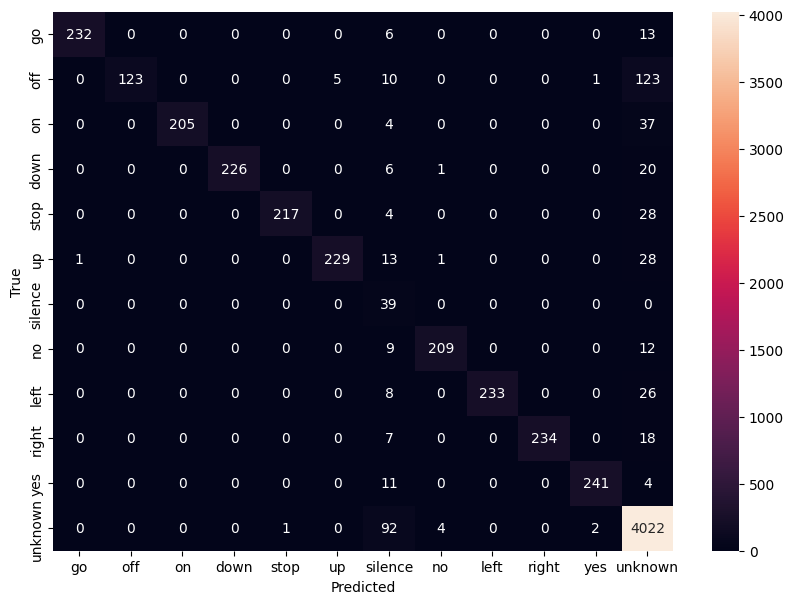

In [108]:
simple_cm(true_labels, output)

In [101]:
ALL_CLASSES = ["go", "off", "on", "down", "stop", "up", "silence", "no", "left", "right", "yes", "unknown"]

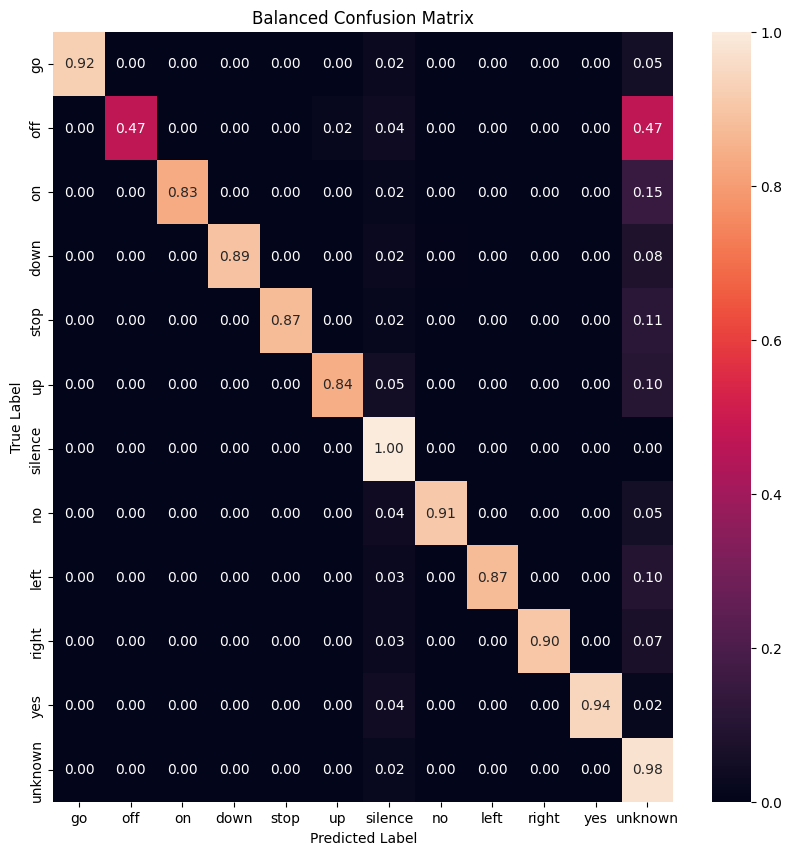

In [106]:
balanced_confusion_m(true_labels, output)

# Medium transcribe model

In [110]:
import torch
torch.cuda.is_available()
import whisper


model_medium = whisper.load_model("medium", device="cuda")

100%|█████████████████████████████████████| 1.42G/1.42G [00:17<00:00, 88.2MiB/s]


In [113]:
import os
import torch
import string
torch.cuda.is_available()
ALL_CLASSES = ["go", "off", "on", "down", "stop", "up", "silence", "no", "left", "right", "yes", "unknown"]
root_dir = '/content/artifacts/speech-raw:v0/test'
#root_dir = '/content/sample'
output2 =[]
# Iterate over all the files in the directory
for dirpath, dirnames, filenames in os.walk(root_dir):
    print(dirpath)
    i=0
    for filename in filenames:
        if dirpath == root_dir:
          continue
        file_path = os.path.join(dirpath, filename)
        data = model_medium.transcribe(file_path)
        if bool(data['segments']):
          for transcript_details in data['segments']:
            if transcript_details["no_speech_prob"]>0.6:
                i+=1
                output2.append(ALL_CLASSES.index("silence"))
                break
            else:
              word = data["text"]
              #Get rid of
              normalized_word=word.lower().strip().translate(str.maketrans('', '', string.punctuation))
              #Assgin to class
              if normalized_word in ALL_CLASSES:
                i+=1
                output2.append(ALL_CLASSES.index(normalized_word))
              else:
                #Assgining to UNKNOWN class
                i+=1
                output2.append(ALL_CLASSES.index("unknown"))
              break
        else:
          i+=1
          output2.append(ALL_CLASSES.index("silence"))
    print(i)

/content/artifacts/speech-raw:v0/test
0
/content/artifacts/speech-raw:v0/test/go
251
/content/artifacts/speech-raw:v0/test/off
262
/content/artifacts/speech-raw:v0/test/on
246
/content/artifacts/speech-raw:v0/test/down
253
/content/artifacts/speech-raw:v0/test/stop
249
/content/artifacts/speech-raw:v0/test/up
272
/content/artifacts/speech-raw:v0/test/silence
39
/content/artifacts/speech-raw:v0/test/no
230
/content/artifacts/speech-raw:v0/test/left
267
/content/artifacts/speech-raw:v0/test/right
259
/content/artifacts/speech-raw:v0/test/yes
256
/content/artifacts/speech-raw:v0/test/unknown
4121


In [114]:
len(output2)

6705

In [115]:
from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy
accuracy = balanced_accuracy_score(true_labels, output2)

print(f"Balanced accuracy: {accuracy}")

Balanced accuracy: 0.8871620688466276


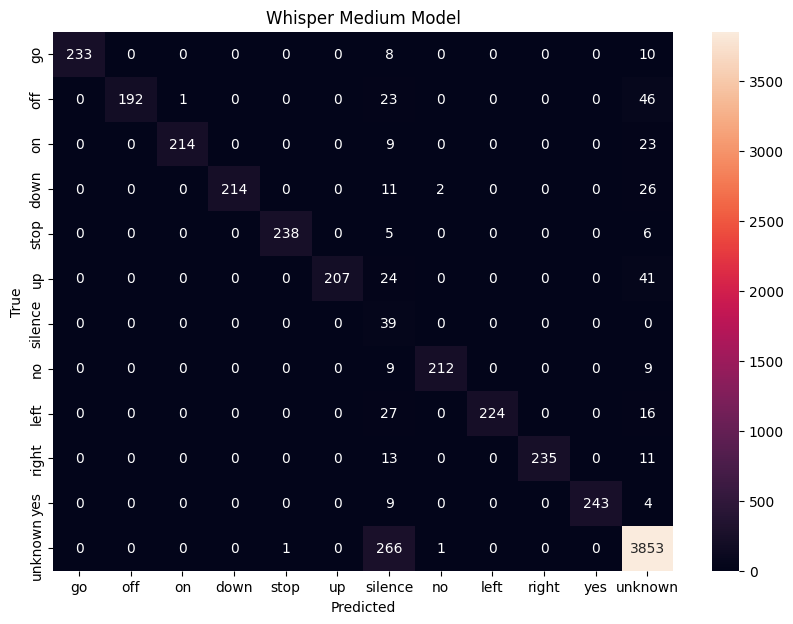

In [125]:
simple_cm(true_labels, output2, title="Whisper Medium Model")

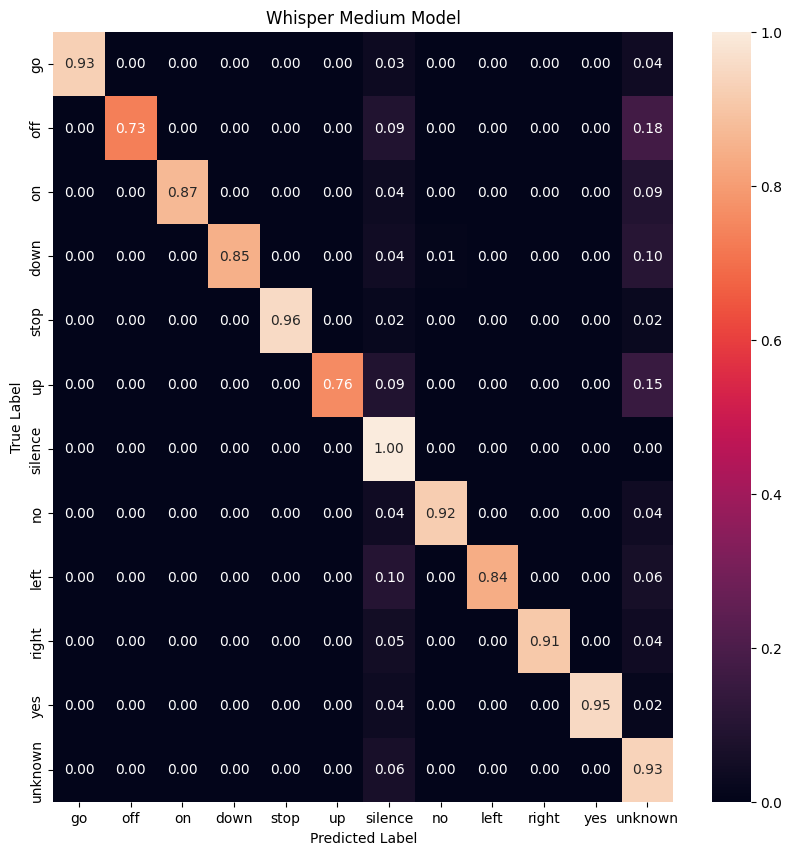

In [124]:
balanced_confusion_m(true_labels, output2, title="Whisper Medium Model")

# Large transcribe model

In [126]:
import torch
torch.cuda.is_available()
import whisper


model_large = whisper.load_model("large", device="cuda")

100%|██████████████████████████████████████| 2.88G/2.88G [00:14<00:00, 218MiB/s]


In [127]:
import os
import torch
import string
torch.cuda.is_available()
ALL_CLASSES = ["go", "off", "on", "down", "stop", "up", "silence", "no", "left", "right", "yes", "unknown"]
root_dir = '/content/artifacts/speech-raw:v0/test'
#root_dir = '/content/sample'
output3 =[]
# Iterate over all the files in the directory
for dirpath, dirnames, filenames in os.walk(root_dir):
    print(dirpath)
    i=0
    for filename in filenames:
        if dirpath == root_dir:
          continue
        file_path = os.path.join(dirpath, filename)
        data = model_large.transcribe(file_path)
        if bool(data['segments']):
          for transcript_details in data['segments']:
            if transcript_details["no_speech_prob"]>0.6:
                i+=1
                output3.append(ALL_CLASSES.index("silence"))
                break
            else:
              word = data["text"]
              #Get rid of
              normalized_word=word.lower().strip().translate(str.maketrans('', '', string.punctuation))
              #Assgin to class
              if normalized_word in ALL_CLASSES:
                i+=1
                output3.append(ALL_CLASSES.index(normalized_word))
              else:
                #Assgining to UNKNOWN class
                i+=1
                output3.append(ALL_CLASSES.index("unknown"))
              break
        else:
          i+=1
          output3.append(ALL_CLASSES.index("silence"))
    print(i)

/content/artifacts/speech-raw:v0/test
0
/content/artifacts/speech-raw:v0/test/go
251
/content/artifacts/speech-raw:v0/test/off
262
/content/artifacts/speech-raw:v0/test/on
246
/content/artifacts/speech-raw:v0/test/down
253
/content/artifacts/speech-raw:v0/test/stop
249
/content/artifacts/speech-raw:v0/test/up
272
/content/artifacts/speech-raw:v0/test/silence
39
/content/artifacts/speech-raw:v0/test/no
230
/content/artifacts/speech-raw:v0/test/left
267
/content/artifacts/speech-raw:v0/test/right
259
/content/artifacts/speech-raw:v0/test/yes
256
/content/artifacts/speech-raw:v0/test/unknown
4121


In [128]:
len(output3)

6705

In [129]:
from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy
accuracy = balanced_accuracy_score(true_labels, output3)

print(f"Balanced accuracy: {accuracy}")

Balanced accuracy: 0.8589847267416245


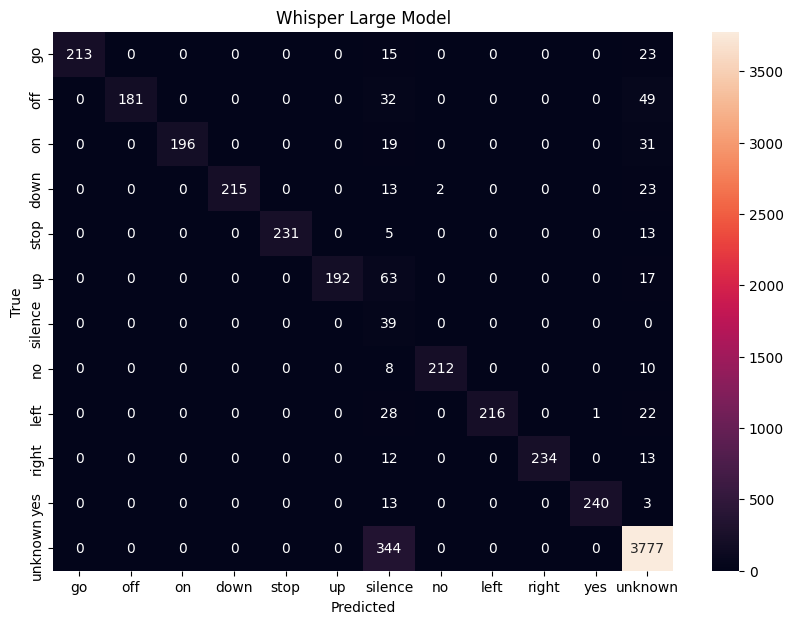

In [130]:
simple_cm(true_labels, output3, title="Whisper Large Model")

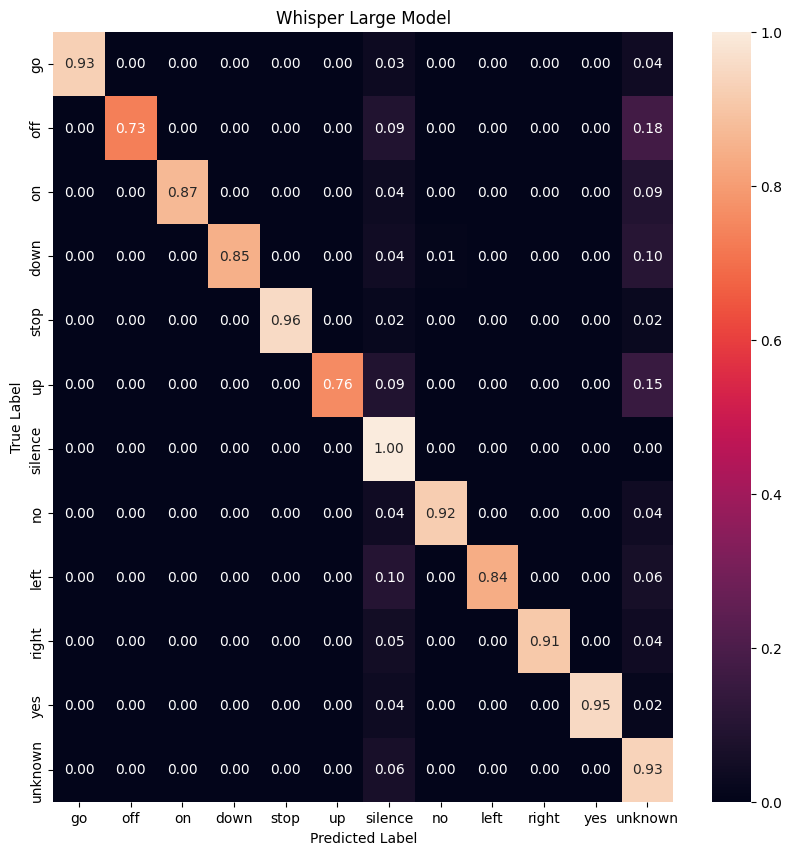

In [131]:
balanced_confusion_m(true_labels, output2, title="Whisper Large Model")

# Main experiment - Whisper Small

In [6]:
import sys
import torch

In [7]:
from transformers import WhisperProcessor, WhisperForConditionalGeneration

In [8]:
dataset, labels = torch.load("artifacts/speech-waveform:v0/train.pt")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [9]:
from torch.utils.data import TensorDataset, DataLoader
tensor_dataset = TensorDataset(dataset, labels)

# Generate a permutation of indices
indices = torch.randperm(len(dataset))

# Use the indices to shuffle the dataset and labels
dataset = dataset[indices]
labels = labels[indices]

In [10]:
dataloader = DataLoader(dataset, batch_size=32)

In [10]:
processor = WhisperProcessor.from_pretrained("openai/whisper-small.en")
model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-small.en").to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.41M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.83k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.94k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/1.93k [00:00<?, ?B/s]

In [11]:
transcriptions = []

In [12]:
len(dataset)

50278

In [13]:
batch_size = 128

# Process data in batches
for i in range(0, len(dataset), batch_size):
    #batch = dataset.numpy()[i:i+batch_size]
    # Tokenize and preprocess batch
    if i+batch_size<len(dataset):
      input_features = processor(
      dataset.numpy()[i:i+batch_size], sampling_rate=16000, return_tensors="pt").input_features.to(device)
    else:
      input_features = processor(
      dataset.numpy()[i:len(dataset)], sampling_rate=16000, return_tensors="pt").input_features.to(device)

    predicted_id = model.generate(input_features)
    transcription = processor.batch_decode(predicted_id, skip_special_tokens=True)
    transcriptions.append(transcription)
    print(batch_size+i)


128
256
384
512
640
768
896
1024
1152
1280
1408
1536
1664
1792
1920
2048
2176
2304
2432
2560
2688
2816
2944
3072
3200
3328
3456
3584
3712
3840
3968
4096
4224
4352
4480
4608
4736
4864
4992
5120
5248
5376
5504
5632
5760
5888
6016
6144
6272
6400
6528
6656
6784
6912
7040
7168
7296
7424
7552
7680
7808
7936
8064
8192
8320
8448
8576
8704
8832
8960
9088
9216
9344
9472
9600
9728
9856
9984
10112
10240
10368
10496
10624
10752
10880
11008
11136
11264
11392
11520
11648
11776
11904
12032
12160
12288
12416
12544
12672
12800
12928
13056
13184
13312
13440
13568
13696
13824
13952
14080
14208
14336
14464
14592
14720
14848
14976
15104
15232
15360
15488
15616
15744
15872
16000
16128
16256
16384
16512
16640
16768
16896
17024
17152
17280
17408
17536
17664
17792
17920
18048
18176
18304
18432
18560
18688
18816
18944
19072
19200
19328
19456
19584
19712
19840
19968
20096
20224
20352
20480
20608
20736
20864
20992
21120
21248
21376
21504
21632
21760
21888
22016
22144
22272
22400
22528
22656
22784
22912
23040
23168

In [14]:
import csv
with open('GFG', 'w') as f:

    # using csv.writer method from CSV package
    write = csv.writer(f)

    write.writerow(transcriptions)

In [15]:
flattened_transcription = [item for sublist in transcriptions for item in sublist]

In [17]:
import string

normalized_transcript = [s.lower().strip().translate(str.maketrans('', '', string.punctuation)) for s in flattened_transcription]

In [18]:
transcript_indices = [ALL_CLASSES.index(t) if t in ALL_CLASSES else ALL_CLASSES.index(UNKNOWN_CLASS) for t in normalized_transcript]

In [19]:
from sklearn.metrics import balanced_accuracy_score

true_labels = labels.flatten().numpy()

# Calculate balanced accuracy
accuracy = balanced_accuracy_score(true_labels, transcript_indices)

print(f"Balanced accuracy: {accuracy}")

Balanced accuracy: 0.8288227791064267


In [37]:
indices = [i for i, (true, predicted) in enumerate(zip(true_labels, transcript_indices)) if true in range(11) and predicted == 11]

In [40]:
indices_dict = {}

# Loop over j from 0 to 10
for j in range(11):
    # Get indices where the true label is j and the predicted label is 11
    indices = [i for i, (true, predicted) in enumerate(zip(true_labels, transcript_indices)) if true == j and predicted == 11]
    # Save indices to the dictionary
    indices_dict[j] = indices

print(indices_dict)

{0: [767, 802, 1991, 2664, 4469, 4522, 5496, 7243, 7548, 8023, 10881, 10952, 11636, 12299, 12839, 13800, 13850, 15546, 16284, 17245, 17734, 20620, 21276, 21475, 21621, 25856, 29995, 32387, 32392, 33161, 33446, 35155, 36253, 36591, 37866, 38915, 39186, 40349, 40874, 42980, 43101, 46004, 46645, 47628], 1: [247, 498, 1638, 2666, 3178, 4767, 10567, 12825, 13370, 13372, 13427, 14755, 15466, 16324, 19023, 20447, 20571, 21088, 22897, 23019, 25047, 25283, 26321, 26868, 27342, 28431, 28492, 29903, 31280, 31380, 32668, 32952, 33363, 33727, 35131, 36042, 36300, 36564, 38402, 39044, 39831, 41386, 41625, 41781, 44036, 44859, 45015, 45017, 45066, 45544, 45742, 46750, 46845, 49214], 2: [186, 548, 599, 663, 736, 843, 1048, 1073, 1149, 1184, 1299, 1358, 1365, 1453, 1618, 1667, 1776, 1833, 2067, 2171, 2309, 2536, 2793, 2935, 3090, 3216, 3232, 3422, 3474, 3496, 3726, 3742, 3791, 3867, 3875, 4278, 4383, 4403, 4554, 4654, 4678, 4794, 4856, 5064, 5107, 5145, 5209, 5305, 5420, 5474, 5658, 5803, 5878, 6004, 6

In [ ]:
i=0
with open('missclassfication.csv', 'w') as f:
  write = csv.writer(f)
  for j in indices_dict.values():
    # Append the values to off_missclassified
    #print(j)
    # Print the corresponding elements of normalized_transcript
    pom =[ALL_CLASSES[i]]
    i+=1
    for index in j:
        #print(normalized_transcript[index])
        pom.append(normalized_transcript[index])
    write.writerow(pom)

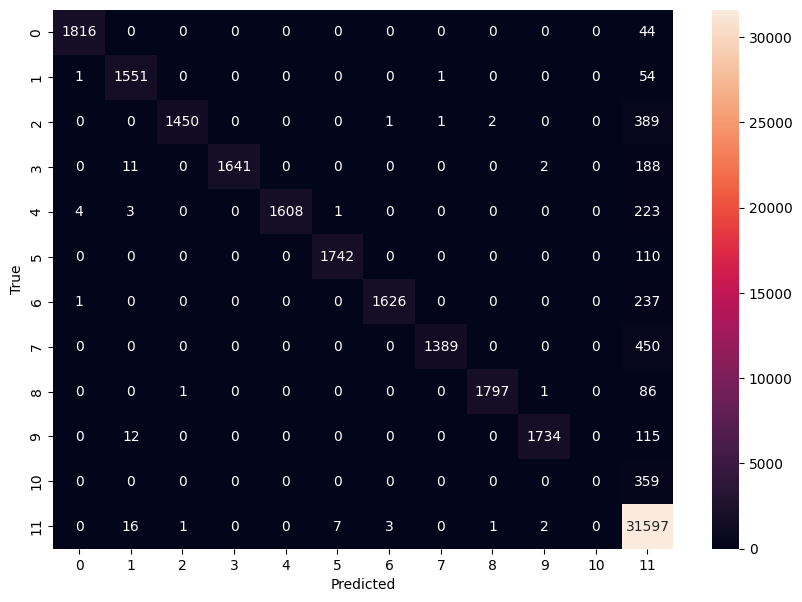

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Suppose `y_true` are the true labels and `y_pred` are the predicted labels
y_true = true_labels # replace with your true labels
y_pred = transcript_indices  # replace with your predicted labels

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
i=0
with open('missclassfication.csv', 'w') as f:
  write = csv.writer(f)
  for j in indices_dict.values():
    # Append the values to off_missclassified
    #print(j)
    # Print the corresponding elements of normalized_transcript
    pom =[ALL_CLASSES[i]]
    i+=1
    for index in j:
        #print(normalized_transcript[index])
        pom.append(normalized_transcript[index])
    write.writerow(pom)

# Main experiment - Whisper Medium

In [69]:
import sys
import torch

In [70]:
from transformers import WhisperProcessor, WhisperForConditionalGeneration

In [71]:
dataset, labels = torch.load("artifacts/speech-waveform:v0/test.pt")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [72]:
from torch.utils.data import TensorDataset, DataLoader
tensor_dataset = TensorDataset(dataset, labels)

# Generate a permutation of indices
indices = torch.randperm(len(dataset))

# Use the indices to shuffle the dataset and labels
dataset = dataset[indices]
labels = labels[indices]

In [11]:
dataloader = DataLoader(dataset, batch_size=32)

In [73]:
processor = WhisperProcessor.from_pretrained("openai/whisper-medium.en")
model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-medium.en").to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.41M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.83k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.95k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.06G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/1.95k [00:00<?, ?B/s]

In [74]:
transcriptions = []

In [75]:
len(dataset)

6705

In [76]:
batch_size = 64

# Process data in batches
for i in range(0, len(dataset), batch_size):
    #batch = dataset.numpy()[i:i+batch_size]
    # Tokenize and preprocess batch
    if i+batch_size<len(dataset):
      input_features = processor(
      dataset.numpy()[i:i+batch_size], sampling_rate=16000, return_tensors="pt").input_features.to(device)
    else:
      input_features = processor(
      dataset.numpy()[i:len(dataset)], sampling_rate=16000, return_tensors="pt").input_features.to(device)

    predicted_id = model.generate(input_features)
    transcription = processor.batch_decode(predicted_id, skip_special_tokens=True)
    transcriptions.append(transcription)
    print(batch_size+i)


64
128
192
256
320
384
448
512
576
640
704
768
832
896
960
1024
1088
1152
1216
1280
1344
1408
1472
1536
1600
1664
1728
1792
1856
1920
1984
2048
2112
2176
2240
2304
2368
2432
2496
2560
2624
2688
2752
2816
2880
2944
3008
3072
3136
3200
3264
3328
3392
3456
3520
3584
3648
3712
3776
3840
3904
3968
4032
4096
4160
4224
4288
4352
4416
4480
4544
4608
4672
4736
4800
4864
4928
4992
5056
5120
5184
5248
5312
5376
5440
5504
5568
5632
5696
5760
5824
5888
5952
6016
6080
6144
6208
6272
6336
6400
6464
6528
6592
6656
6720


In [ ]:
import csv
with open('GFG', 'w') as f:

    # using csv.writer method from CSV package
    write = csv.writer(f)

    write.writerow(transcriptions)

In [78]:
flattened_transcription = [item for sublist in transcriptions for item in sublist]

In [79]:
import string

normalized_transcript = [s.lower().strip().translate(str.maketrans('', '', string.punctuation)) for s in flattened_transcription]

In [91]:
normalized_transcript

['up',
 'house',
 'cat',
 'house',
 '8',
 'dog',
 'six',
 '8',
 'go',
 'right',
 'house',
 'go',
 '4',
 'bird',
 'right',
 'bed',
 'seven',
 'seven',
 'cat',
 'left',
 'bird',
 'on',
 'bed',
 'zero',
 'wow',
 'four',
 'on',
 'bird',
 'happy',
 'yes',
 'on',
 'it',
 'no',
 'yes',
 'true',
 'right',
 'go',
 'left',
 'happy',
 'stop',
 '2',
 'wow',
 'tree',
 '3',
 '3',
 'down',
 'six',
 'too',
 'last',
 'house go',
 'up',
 'four',
 '8',
 'nine',
 'three',
 'right',
 'stop',
 'go',
 'four',
 'bird',
 'off',
 '6',
 'go',
 'stop',
 'five',
 '6',
 'seven',
 '2',
 'wow',
 'bird',
 'seven',
 'on',
 'left',
 'right',
 'house',
 'down',
 'yes',
 'go',
 'go',
 'tree',
 'go',
 'four',
 'birda',
 'house',
 'off',
 'house',
 '2',
 'tü',
 'so',
 'bed',
 'on',
 'house',
 '2',
 'off',
 'zero',
 'no',
 'one',
 '6',
 'three',
 'up',
 'no',
 'up',
 'off',
 'two',
 'marvin',
 'up',
 'cats',
 'house',
 'yes',
 'right',
 'of',
 'up',
 'off',
 'zero',
 'zero',
 'right',
 'tree',
 'yes',
 'stop',
 'yes',
 'bye'

In [85]:
numbers = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [95]:
transcript_indices = [ALL_CLASSES.index(SILENT_CLASS) if t=="" else ALL_CLASSES.index(t) if t in ALL_CLASSES else ALL_CLASSES.index(UNKNOWN_CLASS) for t in normalized_transcript]

In [96]:
from sklearn.metrics import balanced_accuracy_score

true_labels = labels.flatten().numpy()

# Calculate balanced accuracy
accuracy = balanced_accuracy_score(true_labels, transcript_indices)

print(f"Balanced accuracy: {accuracy}")

Balanced accuracy: 0.8322165556105184


In [93]:
indices = [i for i, (true, predicted) in enumerate(zip(true_labels, transcript_indices)) if true in range(11) and predicted == 11]

In [ ]:
indices_dict = {}

# Loop over j from 0 to 10
for j in range(11):
    # Get indices where the true label is j and the predicted label is 11
    indices = [i for i, (true, predicted) in enumerate(zip(true_labels, transcript_indices)) if true == j and predicted == 11]
    # Save indices to the dictionary
    indices_dict[j] = indices

print(indices_dict)

In [ ]:
i=0
with open('missclassfication.csv', 'w') as f:
  write = csv.writer(f)
  for j in indices_dict.values():
    # Append the values to off_missclassified
    #print(j)
    # Print the corresponding elements of normalized_transcript
    pom =[ALL_CLASSES[i]]
    i+=1
    for index in j:
        #print(normalized_transcript[index])
        pom.append(normalized_transcript[index])
    write.writerow(pom)

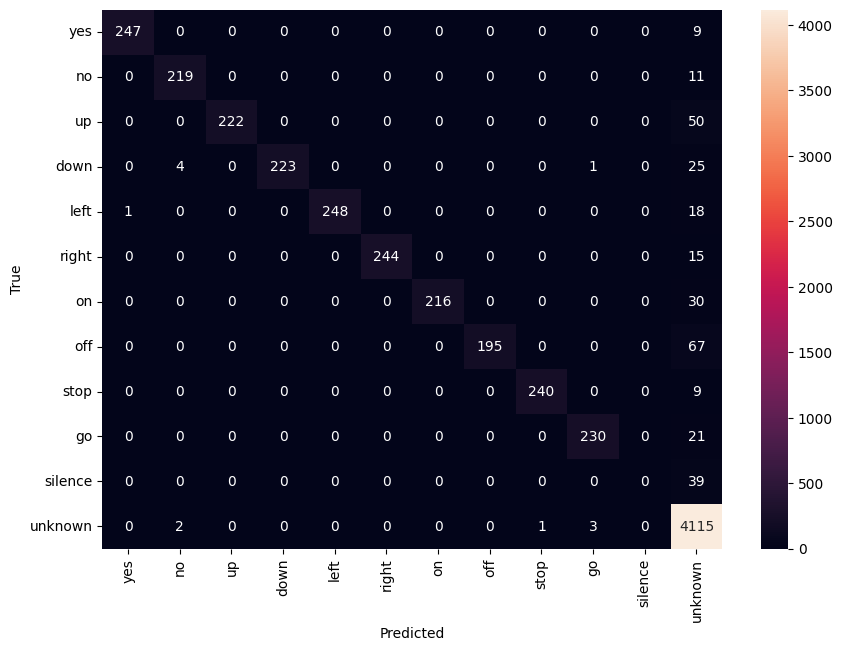

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Suppose `y_true` are the true labels and `y_pred` are the predicted labels
y_true = true_labels # replace with your true labels
y_pred = transcript_indices  # replace with your predicted labels

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=ALL_CLASSES, yticklabels=ALL_CLASSES)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

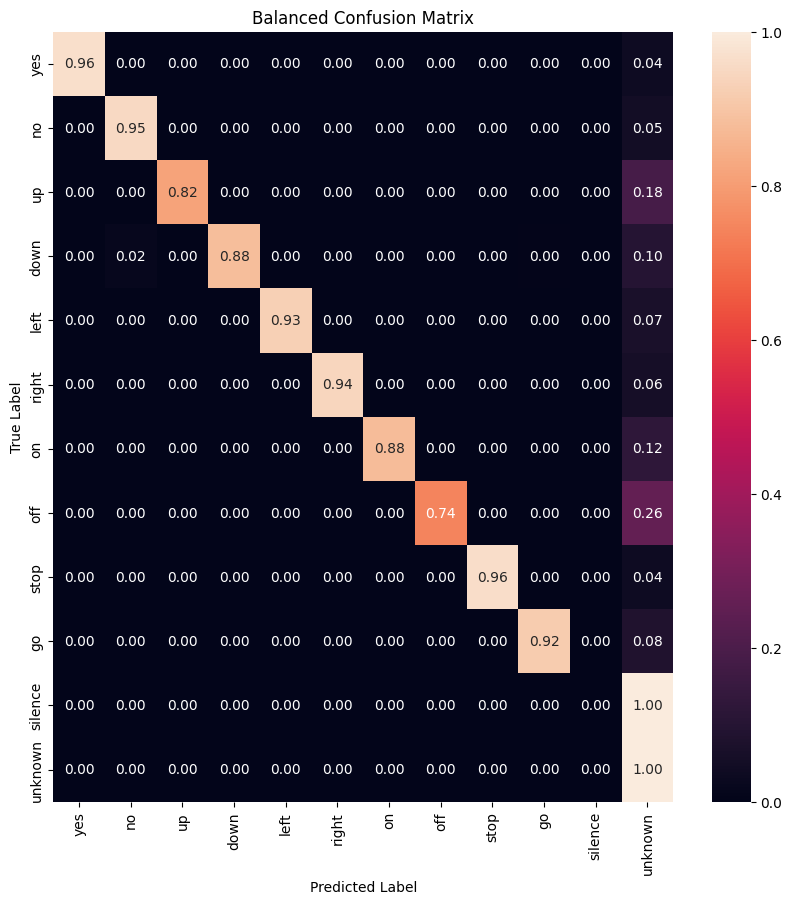

In [98]:
import numpy as np
y_true = true_labels # replace with your true labels
y_pred = transcript_indices  # replace with your predicted labels

cm = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', xticklabels=ALL_CLASSES, yticklabels=ALL_CLASSES)

# Add labels
plt.title('Balanced Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()